In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Task1
Data Preparation



Training set: (4261, 28, 28, 1), Labels: (4261, 10)
Testing set: (1559, 28, 28, 1), Labels: (1559, 10)


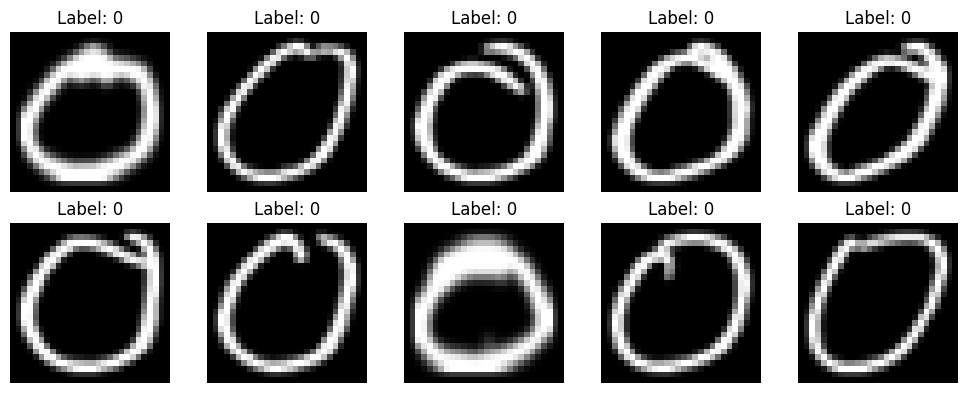

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image

# Define dataset paths
train_dir = "/content/drive/MyDrive/AI and Machine Learning/Copy of devnagari digit/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/drive/MyDrive/AI and Machine Learning/Copy of devnagari digit/DevanagariHandwrittenDigitDataset/Test"

# Define image size
img_height, img_width = 28, 28

# Function to load images and labels using PIL
def load_images_from_folder(folder):
    images = []
    labels = []

    # Check if directory exists
    if not os.path.exists(folder):
        print(f"Error: Directory '{folder}' not found!")
        return np.array([]), np.array([])

    class_names = sorted(os.listdir(folder))  # Sorted class names
    class_map = {name: i for i, name in enumerate(class_names)}  # Map class names to labels

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)

            # Load image using PIL
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img = img.resize((img_width, img_height))  # Resize to (28,28)
            img = np.array(img) / 255.0  # Normalize pixel values to [0,1]

            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Ensure data is loaded correctly
if x_train.size == 0 or x_test.size == 0:
    raise ValueError("Dataset loading failed. Check dataset structure.")

# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1)  # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")  # Fixed quotes
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")

plt.tight_layout()
plt.show()


Task 2
Build the FCN Model


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # Flatten the 28x28 image into a 784-dimensional vector
    Dense(64, activation="sigmoid"),   # 1st hidden layer
    Dense(128, activation="sigmoid"),  # 2nd hidden layer
    Dense(256, activation="sigmoid"),  # 3rd hidden layer
    Dense(10, activation="softmax")    # Output layer (10 classes)
])

# Display model architecture
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

Task 3
Compile the Model

In [ ]:
# Compile the model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


Task 4
Train the Model

In [ ]:
# Set training parameters
batch_size = 128
epochs = 500

# Define callbacks
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath="best_model.keras", save_best_only=True),
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)
]

# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=callbacks
)


Epoch 1/500
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.5962 - loss: 1.1293 - val_accuracy: 0.0000e+00 - val_loss: 7.6007
Epoch 2/500
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9952 - loss: 0.3567 - val_accuracy: 0.0000e+00 - val_loss: 7.7189
Epoch 3/500
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9973 - loss: 0.0357 - val_accuracy: 0.0000e+00 - val_loss: 7.5860
Epoch 4/500
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9969 - loss: 0.0230 - val_accuracy: 0.0000e+00 - val_loss: 6.7776
Epoch 5/500
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9970 - loss: 0.0243 - val_accuracy: 0.0000e+00 - val_loss: 6.0289
Epoch 6/500
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9965 - loss: 0.0236 - val_accuracy: 0.0000e+00 - val_loss: 5.2712
Epoch 7/500
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9958 - loss: 0.0254 - val_accuracy: 0.0000e+00 - val_loss: 5.0445
Epoch 8/500
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9982 - loss: 0.0

Task 5
Evaluate the Model


In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")


49/49 - 1s - 28ms/step - accuracy: 0.0000e+00 - loss: 10.5323
Test accuracy: 0.0000


Task 6
 Save and Load the Model

In [ ]:
# Import TensorFlow
import tensorflow as tf

# Save the trained model in the native Keras format (.keras)
model.save("devnagari_fcn_model.keras")

# Load the saved model
loaded_model = tf.keras.models.load_model("devnagari_fcn_model.keras")

# Re-evaluate the loaded model on the test set
loaded_test_loss, loaded_test_acc = loaded_model.evaluate(x_test, y_test, verbose=2)
print(f"Loaded model test accuracy: {loaded_test_acc:.4f}")

49/49 - 1s - 16ms/step - accuracy: 0.0000e+00 - loss: 10.5323
Loaded model test accuracy: 0.0000


Task 7: Making Predictions

In [ ]:
# Make predictions on test images
predictions = model.predict(x_test)

# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Print first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Predicted label for first image: 1
True label for first image: 4


Visualizing

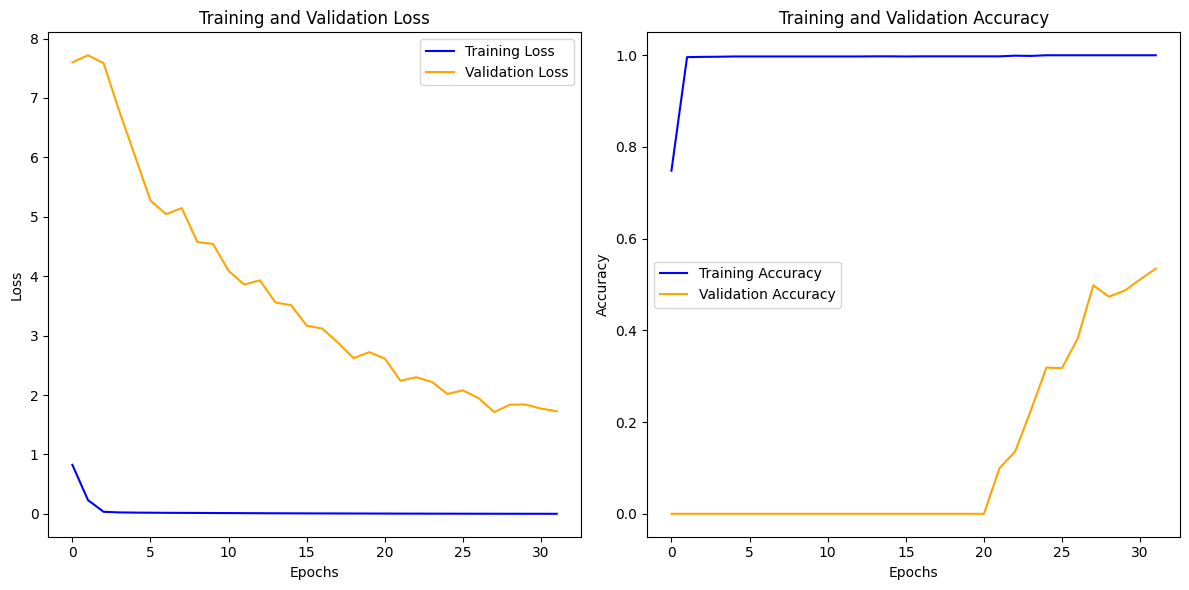

In [ ]:
# Extracting training and validation loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting training and validation loss and accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label="Training Loss", color="blue")
plt.plot(val_loss, label="Validation Loss", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label="Training Accuracy", color="blue")
plt.plot(val_acc, label="Validation Accuracy", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
model.save('/content/drive/MyDrive/devnagari_fcn_model.h5')
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/devnagari_fcn_model.h5')